<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/Khanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os
import re
import numpy as np
from PIL import Image
import cv2
from numpy import asarray
import matplotlib.pyplot as plt
import math

# Read data

In [28]:
def UyXma(arr):
  uy=sum(arr)/len(arr)
  temp=(uy-arr)**2
  t=sum(temp)
  xma=math.sqrt(t*(1/len(arr)))
  return uy,xma
def array_selection(index,H_channel):
  array = np.array([])
  if index == 0 : array=H_channel[(H_channel>0) & (H_channel<=21)]
  elif index == 1:  array=H_channel[(H_channel>150) & (H_channel<=180)]
  elif index==2: array = H_channel[(H_channel>110) & (H_channel<=140)]
  elif index==3: array = H_channel[(H_channel>30) & (H_channel<=50)]
  elif index==4: array = H_channel[(H_channel>16) & (H_channel<=25)]
  elif index==5: array = H_channel[(H_channel>35) & (H_channel<=40)]
  elif index==6: array = H_channel[(H_channel>38) & (H_channel<=55)]
  else: array = H_channel[H_channel>100]
  return array
def Read_data(path_to_zip_file):
  imgzip = zipfile.ZipFile(path_to_zip_file)
  inflist = imgzip.infolist()
  Array = [[],
           [],
           [],
           [],
           [],
           [],
           [],
           []]
  for f in inflist:
       print(f)
       #Đọc ảnh -> array
       ifile = imgzip.open(f)
       image = asarray(Image.open(ifile))   
       #convert RGB -> HSV
       hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
       #select H channel
       H_channel = hsv[:,:,0] 
       #Select fruit's pixel
       fruit = re.search('/(.*)/',f.filename).group(1)
       index = np.where(fruits==fruit)[0][0] 
       array = array_selection(index,H_channel)
       #Add array to Array with corresponding index
       Array[index].extend(array)
  return Array
def Predict(image_path,Uyxma_list):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    plt.imshow(image)
    plt.show()
    h_channel = image[:,:,0]
    nums,index = 0,0
    for i in range(0,len(Uyxma_list)):
       Uy,xma = Uyxma_list[i][0],Uyxma_list[i][1]
       min,max = Uy-2*xma, Uy+2*xma
       temp = np.sum((h_channel>=min)&(h_channel<=max))
       if nums < temp: 
         nums = temp
         index = i
    print('Loai trai cay la:',fruits[index])

In [29]:
fruits = np.array(['Orange','Apple','Grape','Watermelon','Banana','Mango','Lemon','Strawberry'])
path_to_zip_file = '/content/drive/MyDrive/Data Khanh/Khanh.zip'
Array = Read_data(path_to_zip_file)
Uyxma_list = np.zeros((8,2))
for index,lst in enumerate(Array):
    Uyxma_list[index][0],Uyxma_list[index][1] = UyXma(lst)
print(Uyxma_list)

<ZipInfo filename='Fruit Image/Orange/023.jpg' compress_type=deflate file_size=69739 compress_size=69754>
<ZipInfo filename='Fruit Image/Grape/015.jpg' compress_type=deflate file_size=61550 compress_size=61560>
<ZipInfo filename='Fruit Image/Grape/014.jpg' compress_type=deflate file_size=61550 compress_size=61560>
<ZipInfo filename='Fruit Image/Orange/09.jpg' compress_type=deflate file_size=56017 compress_size=56027>
<ZipInfo filename='Fruit Image/Orange/08.jpg' compress_type=deflate file_size=471840 compress_size=471915>
<ZipInfo filename='Fruit Image/Apple/034.jpg' compress_type=deflate file_size=26254 compress_size=26259>
<ZipInfo filename='Fruit Image/Watermelon/020.jpg' compress_type=deflate file_size=62757 compress_size=62767>
<ZipInfo filename='Fruit Image/Watermelon/022.jpg' compress_type=deflate file_size=8569 compress_size=8574>
<ZipInfo filename='Fruit Image/Banana/01.jpg' compress_type=deflate file_size=26854 compress_size=26859>
<ZipInfo filename='Fruit Image/Grape/013.jpg

In [21]:
a = np.random.rand(4,1)

In [23]:
print(a)

[[0.35267917]
 [0.40944324]
 [0.24300262]
 [0.6317122 ]]


In [22]:
uy_a,xma_a = UyXma(a)
print(uy_a,xma_a)

[0.40920931] 0.14171089347844448


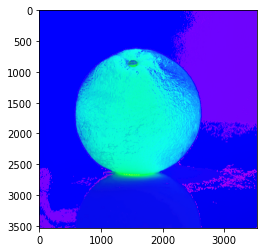

12.566669838690393 4.1152666062406
4.336136626209193 20.797203051171593
4951411
176.45578240642115 4.375569057077018
167.70464429226712 185.20692052057518
6598
122.11824766909336 6.757057483434878
108.60413270222361 135.63236263596312
2255270
39.07159603601474 4.353828798480894
30.36393843905295 47.77925363297653
3577
22.388203355588175 1.5031393992357518
19.381924557116673 25.394482154059677
253100
39.22135755875444 0.9338099487814506
37.35373766119154 41.088977456317345
65
43.81286452800374 3.7031577343735087
36.406549059256726 51.21917999675076
2118
174.363873034634 10.989951396417256
152.3839702417995 196.3437758274685
141847
Loai trai cay la: Orange


In [27]:
image_path = '/content/08.jpg'
Predict(image_path,Uyxma_list)